In [2]:
#Prepare a classification model using Naive Bayes for salary data

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,confusion_matrix

**SalaryDataSet_Train.csv** 


In [5]:
Train=pd.read_csv(r'C:\Users\PC\Downloads\Data Science\Data Science Assignments\12. Naive Bayes\SalaryData_Train.csv')

In [6]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
Train.shape

(30161, 14)

In [8]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
Train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [10]:
Train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### Visualization

<AxesSubplot:xlabel='Salary', ylabel='hoursperweek'>

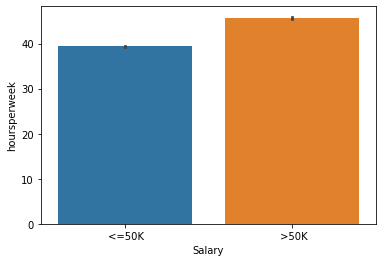

In [11]:
#create a bar plot
sns.barplot(x='Salary',y='hoursperweek',data=Train)

<AxesSubplot:xlabel='Salary', ylabel='count'>

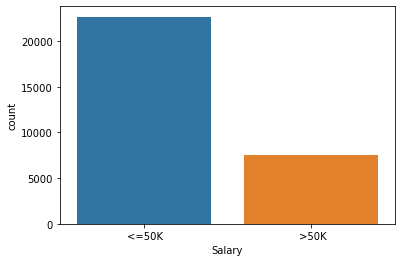

In [12]:
#Create a accurate plot
sns.countplot(x='Salary',data=Train)

Text(0.5, 1.0, 'HeatMap of Features')

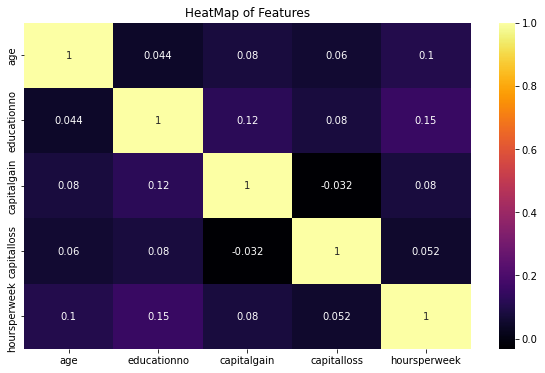

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(Train.corr(),annot=True,cmap='inferno')
plt.title("HeatMap of Features")

In [14]:
#Label Encoder
le=LabelEncoder()

Train['workclass']=le.fit_transform(Train['workclass'])
Train['education']=le.fit_transform(Train['education'])
Train['maritalstatus']=le.fit_transform(Train['maritalstatus'])
Train['occupation']=le.fit_transform(Train['occupation'])
Train['relationship']=le.fit_transform(Train['relationship'])
Train['race']=le.fit_transform(Train['race'])
Train['sex']=le.fit_transform(Train['sex'])
Train['native']=le.fit_transform(Train['native'])
Train['Salary']=le.fit_transform(Train['Salary'])
Train


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [15]:
Train.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

### Model Building

In [16]:
#Model Building
x_Train=Train.drop('Salary',axis=1)
x_Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [17]:
y_Train=Train['Salary']
y_Train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [18]:
print(x_Train.shape)
print(y_Train.shape)

(30161, 13)
(30161,)


In [19]:
MB_model=MultinomialNB()
MB_model.fit(x_Train,y_Train)

MultinomialNB()

In [20]:
#Model testing
y_Train_pred=MB_model.predict(x_Train)
y_Train_pred

array([1, 0, 0, ..., 0, 0, 1])

In [21]:
#model evaluation
print(confusion_matrix(y_Train,y_Train_pred))

[[21717   936]
 [ 5913  1595]]


In [22]:
print(classification_report(y_Train,y_Train_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     22653
           1       0.63      0.21      0.32      7508

    accuracy                           0.77     30161
   macro avg       0.71      0.59      0.59     30161
weighted avg       0.75      0.77      0.73     30161



0.5855605166699157


Text(0, 0.5, 'True Positive Rate')

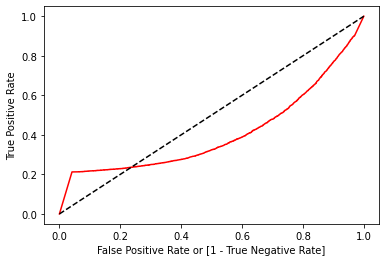

In [23]:
fpr, tpr, thresholds = roc_curve(y_Train,MB_model.predict_proba (x_Train)[:,1])
auc = roc_auc_score(y_Train,y_Train_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='MB model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [24]:
GB_model=GaussianNB()
GB_model.fit(x_Train,y_Train)

GaussianNB()

In [25]:
y_Train_pred=GB_model.predict(x_Train)
y_Train_pred

array([0, 0, 0, ..., 0, 0, 1])

In [26]:
print(confusion_matrix(y_Train,y_Train_pred))

[[21505  1148]
 [ 5025  2483]]


In [27]:
print(classification_report(y_Train,y_Train_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     22653
           1       0.68      0.33      0.45      7508

    accuracy                           0.80     30161
   macro avg       0.75      0.64      0.66     30161
weighted avg       0.78      0.80      0.77     30161



0.640018145361909


Text(0, 0.5, 'True Positive Rate')

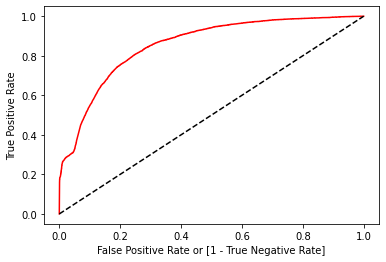

In [ ]:
fpr, tpr, thresholds = roc_curve(y_Train,GB_model.predict_proba (x_Train)[:,1])
auc = roc_auc_score(y_Train,y_Train_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='GB model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

**SalaryDataSet_Test.csv**

In [28]:
#Prepare a classification model using Naive Bayes for salary data
Test=pd.read_csv(r'C:\Users\PC\Downloads\Data Science\Data Science Assignments\12. Naive Bayes\SalaryData_Test.csv')
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [29]:
Test.shape

(15060, 14)

In [30]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [31]:
Test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [32]:
Test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### Visualization

<AxesSubplot:xlabel='Salary', ylabel='hoursperweek'>

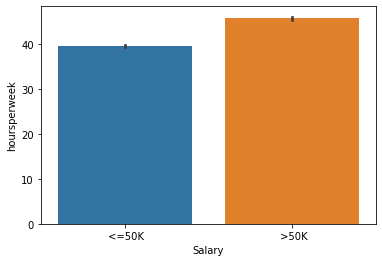

In [33]:
sns.barplot(x='Salary',y='hoursperweek',data=Test)

<AxesSubplot:xlabel='Salary', ylabel='count'>

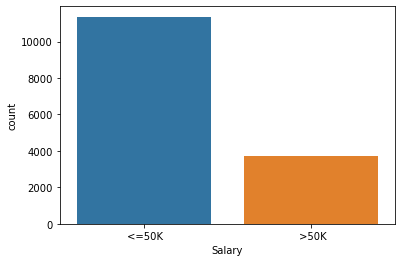

In [34]:
sns.countplot(x='Salary', data=Test)

Text(0.5, 1.0, 'Heatmap of features')

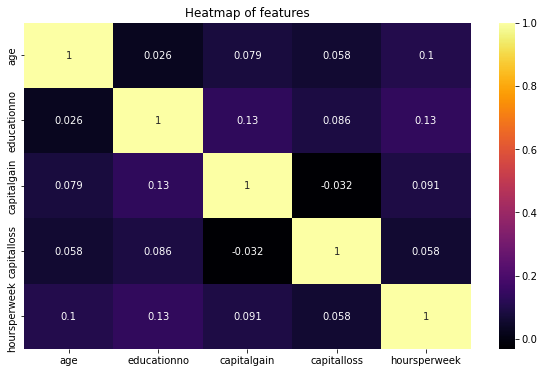

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(Test.corr(),annot=True,cmap="inferno")
plt.title('Heatmap of features')

In [36]:
#Label Encoder
le=LabelEncoder()

Test['workclass']=le.fit_transform(Test['workclass'])
Test['education']=le.fit_transform(Test['education'])
Test['maritalstatus']=le.fit_transform(Test['maritalstatus'])
Test['occupation']=le.fit_transform(Test['occupation'])
Test['relationship']=le.fit_transform(Test['relationship'])
Test['race']=le.fit_transform(Test['race'])
Test['sex']=le.fit_transform(Test['sex'])
Test['native']=le.fit_transform(Test['native'])
Test['Salary']=le.fit_transform(Test['Salary'])
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [37]:
Test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

### Model Building

In [38]:
x_Test=Test.drop('Salary',axis=1)
x_Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [39]:
y_Test=Test['Salary']
y_Test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [40]:
print(x_Test.shape)
print(y_Test.shape)

(15060, 13)
(15060,)


In [41]:
MB_model=MultinomialNB()
MB_model.fit(x_Test,y_Test)


MultinomialNB()

In [42]:
#Model Testing
y_Test_pred=MB_model.predict(x_Test)
y_Test_pred

array([0, 0, 0, ..., 0, 1, 0])

In [43]:
#Model Evaluation
print(confusion_matrix(y_Test,y_Test_pred))

[[10891   469]
 [ 2920   780]]


In [44]:
from sklearn.base import ClassifierMixin
print(classification_report(y_Test,y_Test_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



0.5847627997716026


Text(0, 0.5, 'True Positive Rate')

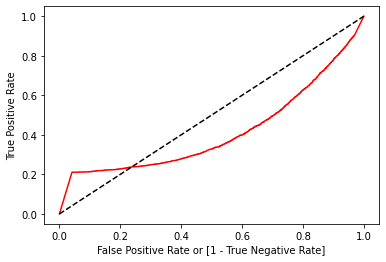

In [45]:
fpr, tpr, thresholds = roc_curve(y_Test,MB_model.predict_proba (x_Test)[:,1])
auc = roc_auc_score(y_Test,y_Test_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='MB model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [46]:
GB_model=GaussianNB()
GB_model.fit(x_Test,y_Test)

GaussianNB()

In [47]:
y_Test_pred=GB_model.predict(x_Test)
y_Test_pred

array([0, 0, 0, ..., 0, 1, 0])

In [48]:
print(confusion_matrix(y_Test,y_Test_pred))

[[10777   583]
 [ 2516  1184]]


In [49]:
print(classification_report(y_Test,y_Test_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.32      0.43      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.63      0.65     15060
weighted avg       0.78      0.79      0.77     15060



0.6343397887323944


Text(0, 0.5, 'True Positive Rate')

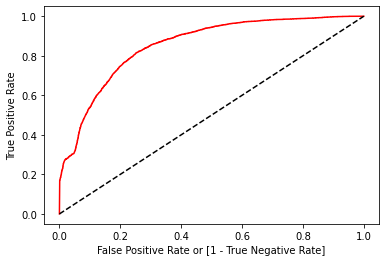

In [50]:
fpr, tpr, thresholds = roc_curve(y_Test,GB_model.predict_proba (x_Test)[:,1])
auc = roc_auc_score(y_Test,y_Test_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='GB model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')